In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

ModuleNotFoundError: No module named 'tensorflow'

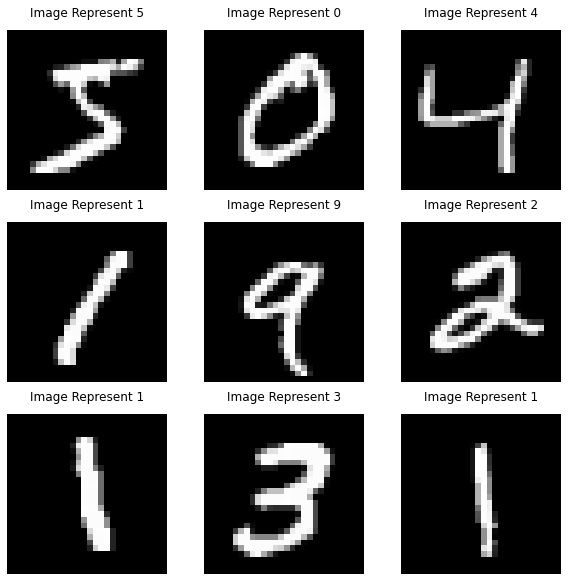

In [ ]:
import matplotlib.pyplot as plt

fig, axs=plt.subplots(3,3,figsize=(10,10))
plt.gray()
for i, ax in enumerate (axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Image Represent {}'.format(y_train[i]))
fig.show()

Image Represent {} 5


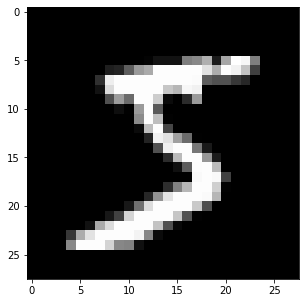

Image Represent {} 0


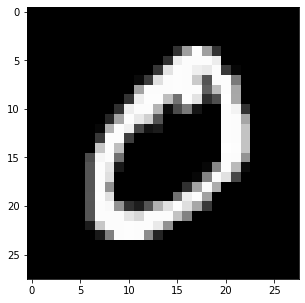

Image Represent {} 4


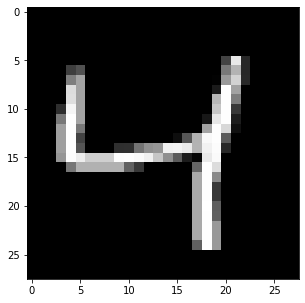

Image Represent {} 1


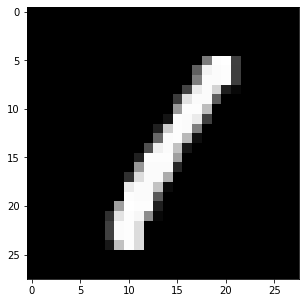

Image Represent {} 9


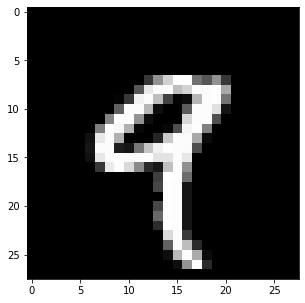

Image Represent {} 2


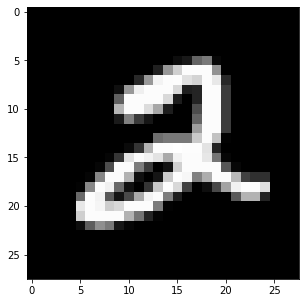

Image Represent {} 1


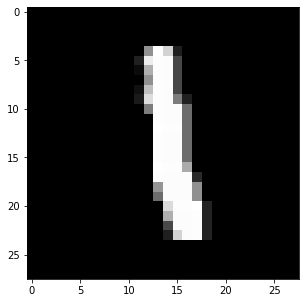

Image Represent {} 3


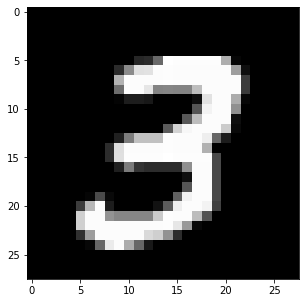

Image Represent {} 1


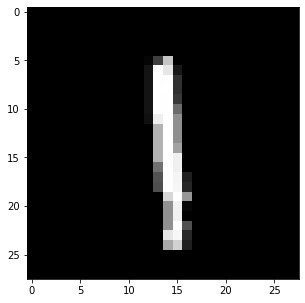

Image Represent {} 4


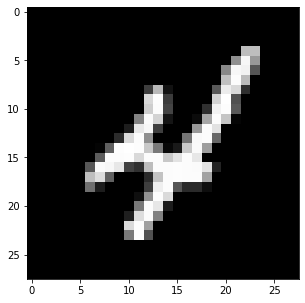

In [ ]:
for i in range(0,10):
    plt.figure(figsize=(5,5))
    plt.imshow(x_train[i])
    print('Image Represent', y_train[i])
    plt.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape= (28, 28, 1)
print(x_train.ndim)

4


In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print('Number of image in x_train', x_train.shape[0])
print('Number of image in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of image in x_train 60000
Number of image in x_test 10000


In [ ]:
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(28, kernel_size=(3,3),input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ]
)

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2067 - accuracy: 0.9388
Epoch 2/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0857 - accuracy: 0.9736
Epoch 3/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0594 - accuracy: 0.9819


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0543 - accuracy: 0.9824


[0.05431602895259857, 0.9824000000953674]

In [ ]:
p=model.predict(x_test)

In [ ]:
import numpy as np
classes = range(0,10)

names = ['0',
         '1',
         '2',
         '3',
         '4',
         '5',
         '6',
         '7',
         '8',
         '9']

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes,names))

#generate batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

#make predictions
pred = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(pred)

[[8.1573844e-06 2.1842672e-08 2.2773136e-07 3.6176240e-09 1.3834568e-07
  3.8102944e-06 9.9998677e-01 4.7915862e-09 7.9469152e-07 2.7581459e-08]
 [9.9999368e-01 6.3602257e-09 2.4009643e-07 1.3714400e-09 6.8022088e-11
  4.9264537e-07 5.0002395e-06 8.3848605e-08 1.8126298e-07 2.5419598e-07]
 [1.1056308e-11 3.2132980e-10 4.5513550e-14 7.3320471e-06 8.5106523e-12
  9.9999022e-01 3.5548921e-13 3.2246900e-12 5.3651146e-08 2.2840284e-06]
 [3.2860392e-13 1.5188141e-09 1.8347662e-10 5.2916781e-12 1.0000000e+00
  2.7024787e-11 2.3829057e-11 8.0568627e-09 1.8331642e-10 5.8944138e-09]
 [8.6900093e-10 4.2992743e-10 1.8363105e-08 4.9584149e-05 1.3943827e-04
  3.7514686e-03 3.4425926e-10 1.5565500e-07 2.4378210e-06 9.9605680e-01]
 [8.6736346e-10 3.0227210e-10 6.0345066e-08 2.9489461e-06 1.6402122e-06
  2.1079417e-07 1.2040568e-12 6.3486339e-05 9.2803583e-07 9.9993074e-01]
 [5.7301287e-07 3.6095566e-06 9.9996912e-01 8.4331086e-06 4.5269465e-11
  3.8533615e-10 1.2404190e-09 1.6015671e-05 2.2725969e-06 

In [ ]:
for image in pred:
    print(np.sum(image))

0.9999999
0.99999994
0.9999999
1.0
0.9999999
1.0
1.0
0.99999994
0.99999994


In [ ]:
class_result = np.argmax(pred, axis=-1)
print(class_result)

[6 0 5 4 9 9 2 1 9]
